In [1]:
import torch
import imp
import ppuu.costs

from ppuu.data.dataloader import DataStore, Dataset, Normalizer
from ppuu import configs

In [25]:
store = DataStore('/home/us441/nvidia-collab/vlad/traffic-data-5-small/state-action-cost/data_i80_v0/')
ds = Dataset(store, 'train', 20, 30, 40, shift=False, random_actions=False, state_diffs=True)
loader = torch.utils.data.DataLoader(ds, batch_size=2)
normalizer = Normalizer(store.stats)

In [26]:
it = iter(loader)
batch = next(it)

In [37]:
seq = batch.conditional_state_seq.with_ego()
seq.images[:, :, 3].max()

tensor(1.)

# Load the module 

In [3]:
from ppuu.lightning_modules.policy import uber

In [4]:
checkpoint_path = '/home/us441/vlad_5/results/uber/2/lr=1e-4/seed=42/checkpoints/last.ckpt'
checkpoint = torch.load(checkpoint_path)

In [5]:
checkpoint.keys()

dict_keys(['epoch', 'global_step', 'pytorch-lightning_version', 'state_dict', 'callbacks', 'optimizer_states', 'lr_schedulers', 'hyper_parameters'])

In [6]:
checkpoint['hyper_parameters']

{'model': {'arch': 'resnet50',
  'raster_dim': 3,
  'state_dim': 5,
  'in_horizon': 20,
  'out_dim': 2,
  'out_horizon': 60,
  'pretrained': False,
  'n_modes': 3,
  'alpha': 1.0},
 'training': {'comment': '',
  'learning_rate': 0.0001,
  'n_epochs': 40,
  'n_steps': 10000000.0,
  'epoch_size': 1000,
  'batch_size': 256,
  'validation_size': 25,
  'validation_period': 1,
  'dataset': '/home/us441/nvidia-collab/vlad/traffic-data-5/state-action-cost/data_i80_v0/',
  'data_shift': False,
  'random_actions': False,
  'seed': 42,
  'output_dir': '/home/us441/vlad_5/results/uber/2',
  'experiment_name': 'lr=1e-4',
  'slurm': False,
  'slurm_constraint': 'turing',
  'run_eval': False,
  'grad_clip_val': 0.5,
  'debug': False,
  'fast_dev_run': False,
  'freeze_encoder': False,
  'mixout_p': None,
  'validation_eval': True,
  'noise_augmentation_std': 0.07,
  'noise_augmentation_p': 0.0,
  'wandb_offline': False,
  'gpus': 1,
  'num_nodes': 1,
  'distributed_backend': 'ddp',
  'resume_from_che

In [7]:
module = uber.UberPolicyModule(checkpoint['hyper_parameters'])

In [8]:
module.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

# Create wrapper 

In [9]:
module.normalizer = normalizer
wrapper = uber.EvaluationWrapper(module)

# Apply it to one batch 

In [11]:
wrapper(batch.conditional_state_seq, normalize_inputs=True, normalize_outputs=True)

tensor([[-2.6327e+02, -2.2022e-02],
        [-2.3787e+02, -3.9616e-02]], grad_fn=<AddBackward0>)

In [12]:
values = []
for i in range(100):
    batch = next(it)
    res = wrapper(batch.conditional_state_seq, normalize_inputs=True, normalize_outputs=True)
    values.append(res)

StopIteration: 

In [15]:
values

[tensor([[-3.6909e+02, -6.0055e-02],
         [-3.6583e+02, -7.0989e-02]], grad_fn=<AddBackward0>),
 tensor([[-2.6641e+02, -2.2915e-02],
         [-2.5884e+02, -2.3548e-02]], grad_fn=<AddBackward0>),
 tensor([[-5.4493e+02, -5.2381e-02],
         [-2.5671e+02, -2.3349e-02]], grad_fn=<AddBackward0>),
 tensor([[-2.4620e+02, -2.2433e-02],
         [-2.7479e+02, -2.5098e-02]], grad_fn=<AddBackward0>),
 tensor([[-2.5746e+02, -2.1964e-02],
         [-2.4524e+02, -2.1954e-02]], grad_fn=<AddBackward0>),
 tensor([[-2.7410e+02, -2.2882e-02],
         [-2.3601e+02, -2.0618e-02]], grad_fn=<AddBackward0>),
 tensor([[-4.2055e+02, -7.4988e-02],
         [-2.4718e+02, -2.2670e-02]], grad_fn=<AddBackward0>),
 tensor([[-4.9685e+02, -9.9779e-02],
         [-2.4626e+02, -4.1245e-02]], grad_fn=<AddBackward0>),
 tensor([[-2.5826e+02, -4.1712e-02],
         [-2.5271e+02, -2.1198e-02]], grad_fn=<AddBackward0>),
 tensor([[-2.4227e+02, -2.1205e-02],
         [-2.4172e+02, -4.0191e-02]], grad_fn=<AddBackward0>),


# Visualizing results 

In [8]:
path = '/home/us441/vlad_5/results/uber/3/lr=1e-4/seed=42/evaluation_results/last.ckpt/episode_data/2'

In [9]:
x = torch.load(path)

In [10]:
x.keys()

dict_keys(['action_sequence', 'state_sequence', 'cost_sequence', 'images', 'gradients', 'result'])

In [11]:
len(x['images'])

53

In [12]:
x['images'][0].shape

torch.Size([3, 117, 24])

In [14]:
x['action_sequence']

tensor([[-0.2558,  0.2108],
        [-0.2980,  0.2033],
        [-0.3086,  0.1910],
        [-0.3505,  0.2572],
        [-0.3096,  0.1600],
        [-0.3357,  0.3078],
        [-0.2764,  0.2428],
        [-0.1935,  0.1523],
        [-0.2947,  0.3298],
        [-0.2808,  0.2055],
        [-0.2684,  0.2217],
        [-0.2078,  0.1731],
        [-0.2752,  0.1229],
        [-0.2888,  0.2049],
        [-0.2274,  0.1599],
        [-0.2040,  0.0626],
        [-0.2940,  0.1534],
        [-0.2561,  0.0742],
        [-0.1642,  0.0383],
        [-0.2433,  0.0697],
        [-0.2183,  0.1870],
        [-0.0857,  0.0309],
        [-0.2183, -0.0019],
        [-0.1522,  0.0269],
        [-0.2165,  0.0306],
        [-0.1106,  0.0299],
        [-0.0990,  0.0800],
        [-0.2189,  0.0288],
        [-0.1592,  0.0762],
        [-0.2162,  0.0018],
        [-0.1783, -0.0044],
        [-0.2136, -0.0110],
        [-0.1604,  0.0634],
        [-0.1115, -0.0206],
        [-0.1103,  0.0648],
        [-0.1995,  0

ValueError: num must be 1 <= num <= 25, not 26

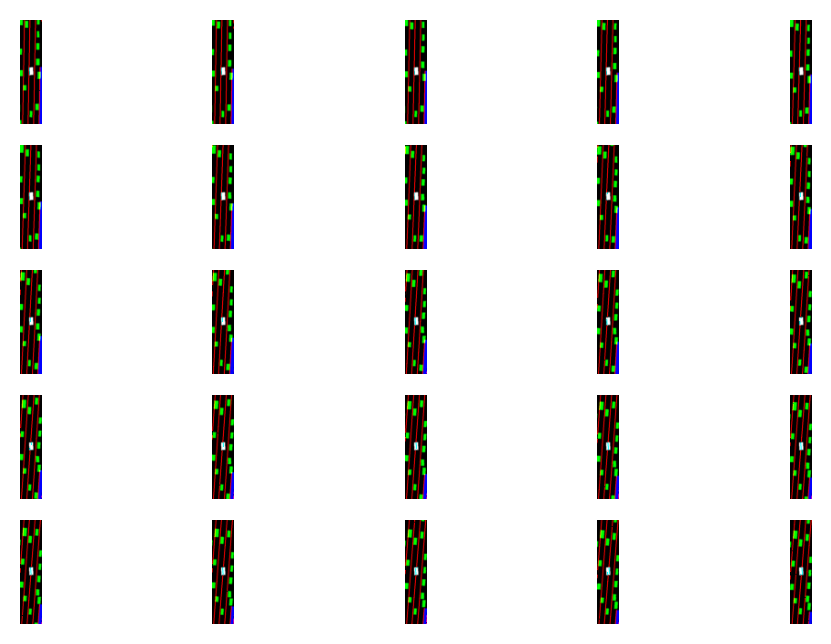

In [13]:
from matplotlib import pyplot as plt

plt.figure(dpi=200)

for i in range(len(x['images'])):
    plt.subplot(5, 5, (i+1))
    plt.imshow(x['images'][i].permute(1, 2, 0))
    plt.axis('off')
    
plt.tight_layout()

# Checking actions of different episodes 

In [15]:
all_actions = []
for i in range(10):
    p = f'/home/us441/vlad_5/results/uber/3/lr=1e-4/seed=42/evaluation_results/last.ckpt/episode_data/{i}'
    x = torch.load(p)
    all_actions.append(x['action_sequence'])
    
all_actions = torch.cat(all_actions, dim=0)

In [16]:
all_actions.shape

torch.Size([599, 2])

(array([ 11.,  20.,  68.,  76.,  60., 185., 140.,  32.,   6.,   1.]),
 array([-0.5809381 , -0.47154114, -0.36214414, -0.25274718, -0.1433502 ,
        -0.03395322,  0.07544376,  0.18484074,  0.2942377 ,  0.4036347 ,
         0.51303166], dtype=float32),
 <a list of 10 Patch objects>)

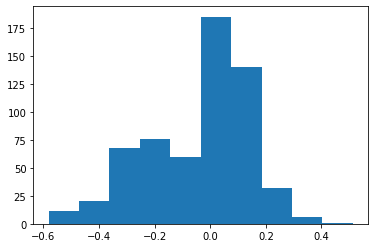

In [20]:
from matplotlib import pyplot as plt
plt.hist(all_actions[:, 0])

(array([  7.,   7.,  29.,  80., 182., 172.,  51.,  39.,  23.,   9.]),
 array([-0.30725348, -0.23623747, -0.16522145, -0.09420544, -0.02318943,
         0.04782659,  0.1188426 ,  0.18985862,  0.26087463,  0.33189064,
         0.40290666], dtype=float32),
 <a list of 10 Patch objects>)

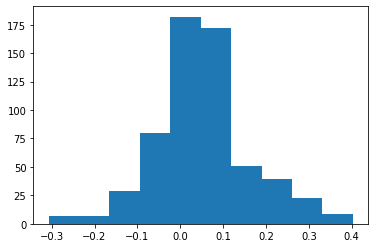

In [21]:
plt.hist(all_actions[:, 1])

In [22]:
stats = torch.load('/home/us441/nvidia-collab/vlad/traffic-data-5/state-action-cost/data_i80_v0/data_stats_with_diff.pth')

In [23]:
stats

{'a_mean': tensor([ 2.3882e-01, -3.0282e-05]),
 'a_std': tensor([5.0794e+00, 2.1236e-03]),
 's_mean': tensor([ 8.8860e+02,  1.1793e+02,  9.9987e-01, -7.3548e-03,  3.6452e+01]),
 's_std': tensor([3.9264e+02, 4.4071e+01, 2.5642e-03, 3.5596e-02, 2.4480e+01]),
 's_diff_mean': tensor([ 3.6442e+00, -2.4507e-02,  9.9987e-01, -7.3619e-03,  3.6411e+01]),
 's_diff_std': tensor([2.4434e+00, 1.0887e-01, 2.5655e-03, 3.5613e-02, 2.4460e+01])}